## LU count densities in different FrameNets

This notebook was developed to plot in the same image the distributions of LU counts in different FrameNets. The multilingual alignment code is used only to load data from .xml sources, after loading Kernel Density Estimation (KDE) is used to transform the histogram in a smooth curve that is plotted.

In [1]:
configs = [    
    ('chinesefn', 'zh'),
    ('japanesefn', 'ja'),
    ('frenchfn', 'fr'),
    ('spanishfn', 'es'),
    ('fnbrasil', 'pt'),
    ('fncopa', 'pt'),
    ('swedishfn', 'sv'),
    ('salsa', 'de'),
]

In [2]:
from fnalign.loaders import load

# Load frames for all languages
data = {
    db_name: load(db_name, lang)
    for db_name, lang in configs
}

data["bfn"] = load("bfn", "eng")

In [3]:
# Compute counts
import numpy as np

counts = [
    (np.array(list(map(lambda x: len(x.lus), fn.frames))).reshape(-1, 1), label)
    for label, fn in data.items()
]

In [4]:
# Kernel density estimation
from sklearn.neighbors import KernelDensity

models = [
    (KernelDensity(kernel="gaussian", bandwidth=3).fit(X), label)
    for X, label in counts
]

Text(0.5, 0, 'Number of LUs')

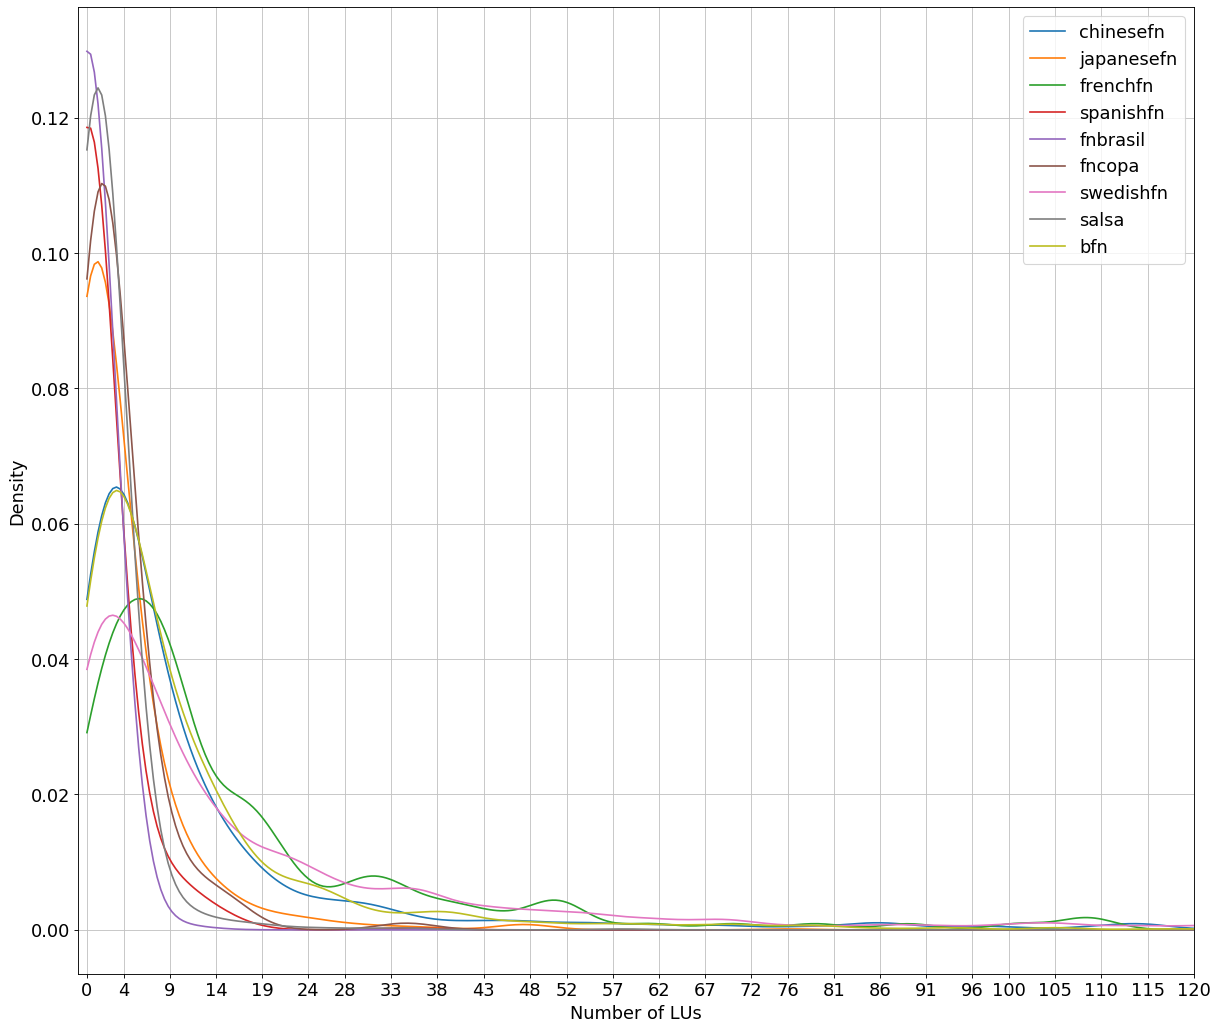

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 16})

# Estimation plotting
fig, ax = plt.subplots(figsize=(18, 16), dpi= 80)
plt_space = np.linspace(0, 400, 1000)[:, np.newaxis]

for estimator, label in models:
    log_dens = estimator.score_samples(plt_space)
    ax.plot(plt_space[:, 0], np.exp(log_dens), label=label)
    
xmax=120
ax.set_xlim(-1, xmax)
ax.set_xticks(np.linspace(0,xmax,26, dtype=np.int))


plt.grid(b=True, which='major', color='#c3c3c3', linestyle='-')

ax.legend(loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Number of LUs')

In [14]:
for k, v in data.items():
    print(k)
    core_fes = lambda frm: [fe for fe in frm.fes if fe.type is not None and fe.type.lower() == "core"]
    print('\t Frames: ' + str(len(v.frames)))
    print('\t LUs: ' + str(sum(map(lambda x: len(x.lus), v.frames))))
    print('\t FEs: ' + str(sum(map(lambda x: len(x.fes), v.frames))))
    print('\t Core FEs: ' + str(sum(map(lambda x: len(core_fes(x)), v.frames))))

chinesefn
	 Frames: 1259
	 LUs: 20551
	 FEs: 11052
	 Core FEs: 0
japanesefn
	 Frames: 984
	 LUs: 3392
	 FEs: 8362
	 Core FEs: 2863
frenchfn
	 Frames: 148
	 LUs: 2590
	 FEs: 1382
	 Core FEs: 538
spanishfn
	 Frames: 1196
	 LUs: 1269
	 FEs: 11325
	 Core FEs: 3407
fnbrasil
	 Frames: 1092
	 LUs: 251
	 FEs: 10094
	 Core FEs: 3190
fncopa
	 Frames: 384
	 LUs: 1125
	 FEs: 3080
	 Core FEs: 965
swedishfn
	 Frames: 1186
	 LUs: 38749
	 FEs: 11038
	 Core FEs: 3493
salsa
	 Frames: 1023
	 LUs: 1826
	 FEs: 5024
	 Core FEs: 2880
bfn
	 Frames: 1221
	 LUs: 13631
	 FEs: 11428
	 Core FEs: 3501
